In [1]:
# Install dependencies
!pip install ultralytics roboflow

In [2]:
# Import necessary libraries
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow
import os
import torch

In [3]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Download dataset from Roboflow
rf = Roboflow(api_key="Npr82rgYiQ5A5trJBlb8")
project = rf.workspace("capstone2025-mifho").project("military-base-object-detection")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
# Get dataset directory
dataset_path = dataset.location

In [6]:
# Define YOLOv8 model (pretrained on COCO, transfer learning to your dataset)
model = YOLO("yolov8n.pt").to(device)  # Move model to GPU if available

In [7]:
# Adjust batch size for CPU if necessary
batch_size = 8 if device == 'cuda' else 2  # Reduce batch size for CPU

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar
# Train the model and log losses
results = model.train(
    data=os.path.join(dataset_path, "data.yaml"),  # Path to dataset config
    epochs=20,  # Number of training epochs
    batch=batch_size,  # Adjusted batch size
    imgsz=640,  # Image size
    device=device,  # Use GPU if available
    verbose=False  # Suppress default output
)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Military-Base-Object-Detection-12/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/Military-Base-Object-Detection-12/train/labels.cache... 9752 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9752/9752 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Military-Base-Object-Detection-12/valid/labels.cache... 2799 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2799/2799 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.47G      1.543      2.914      1.478         51        640: 100%|██████████| 1219/1219 [03:46<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.15it/s]


                   all       2799       7114      0.478      0.294      0.303        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.52G       1.52      2.214      1.464         14        640: 100%|██████████| 1219/1219 [03:37<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.09it/s]


                   all       2799       7114       0.58      0.322      0.363      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.52G       1.51      2.019       1.46         28        640: 100%|██████████| 1219/1219 [03:37<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.07it/s]


                   all       2799       7114      0.679      0.327      0.349      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.52G      1.485      1.872      1.437         35        640: 100%|██████████| 1219/1219 [03:35<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.16it/s]


                   all       2799       7114      0.527      0.382        0.4      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.52G      1.451      1.741      1.416         31        640: 100%|██████████| 1219/1219 [03:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.12it/s]


                   all       2799       7114      0.673      0.334       0.39      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.52G      1.417      1.643      1.399         48        640: 100%|██████████| 1219/1219 [03:31<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.21it/s]


                   all       2799       7114      0.655      0.347      0.394      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.52G      1.391      1.582      1.377         30        640: 100%|██████████| 1219/1219 [03:32<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.23it/s]


                   all       2799       7114      0.475      0.411      0.429      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.53G      1.364      1.509      1.354         30        640: 100%|██████████| 1219/1219 [03:31<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.15it/s]


                   all       2799       7114      0.681      0.368      0.422      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.53G      1.351      1.472      1.342         91        640: 100%|██████████| 1219/1219 [03:37<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.12it/s]


                   all       2799       7114      0.617      0.377      0.434      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.53G      1.317      1.405      1.323         29        640: 100%|██████████| 1219/1219 [03:38<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:32<00:00,  5.32it/s]


                   all       2799       7114      0.637      0.362      0.422      0.249
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.53G       1.28      1.274      1.327         12        640: 100%|██████████| 1219/1219 [03:32<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.25it/s]


                   all       2799       7114      0.535      0.365      0.413      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.53G      1.245      1.195      1.303         12        640: 100%|██████████| 1219/1219 [03:28<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:32<00:00,  5.33it/s]


                   all       2799       7114      0.453      0.421      0.421      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.53G      1.223      1.144      1.291         93        640: 100%|██████████| 1219/1219 [03:31<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.15it/s]


                   all       2799       7114      0.427      0.423      0.419      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.53G        1.2      1.092      1.272         15        640: 100%|██████████| 1219/1219 [03:27<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.14it/s]


                   all       2799       7114       0.43      0.427      0.415      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.53G      1.179      1.046      1.252         16        640: 100%|██████████| 1219/1219 [03:32<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.29it/s]


                   all       2799       7114      0.554        0.4      0.436      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.53G      1.152      1.004      1.234         53        640: 100%|██████████| 1219/1219 [03:29<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.26it/s]


                   all       2799       7114      0.481      0.418       0.44      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.53G      1.137     0.9698      1.224         16        640: 100%|██████████| 1219/1219 [03:25<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.12it/s]


                   all       2799       7114      0.512      0.418       0.44      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.53G      1.121     0.9466      1.215         29        640: 100%|██████████| 1219/1219 [03:28<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.16it/s]


                   all       2799       7114      0.534      0.411      0.448      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.53G      1.107     0.9111      1.204         48        640: 100%|██████████| 1219/1219 [03:25<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:31<00:00,  5.51it/s]


                   all       2799       7114      0.471      0.454      0.451      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.53G      1.076      0.872       1.18         13        640:  88%|████████▊ | 1072/1219 [02:59<00:18,  7.96it/s]

In [10]:

# Evaluate the model
metrics = model.val()
print("Validation Metrics:", metrics)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/Military-Base-Object-Detection-12/valid/labels.cache... 2799 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2799/2799 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 350/350 [00:36<00:00,  9.48it/s]


                   all       2799       7114      0.559       0.42      0.455      0.272
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train53
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  3,  5,  7,  8, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799d1e7be450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0

In [11]:

CLASSES = ['Aircraft', 'Camouflage', 'Drone', 'Fire', 'Grenade','Hand-Gun', 'Knife', 'Military-Vehicle', 'Missile', 'Pistol', 'Rifle', 'Smoke', 'Soldier']

In [12]:
# Run inference on the test dataset
test_results = model.val(data=os.path.join(dataset_path, "data.yaml"), split='test')

# Print test metrics
print("Test Results:", test_results)


Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/Military-Base-Object-Detection-12/test/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


                   all        154        392      0.835      0.654       0.74      0.516
Speed: 2.5ms preprocess, 7.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train54
Test Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799d1ad11b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.0280

In [13]:
# Extract and print mAP metrics
print(f"mAP@50: {test_results.box.map50:.2f}")
print(f"mAP@75: {test_results.box.map75:.2f}")

mAP@50: 0.74
mAP@75: 0.55


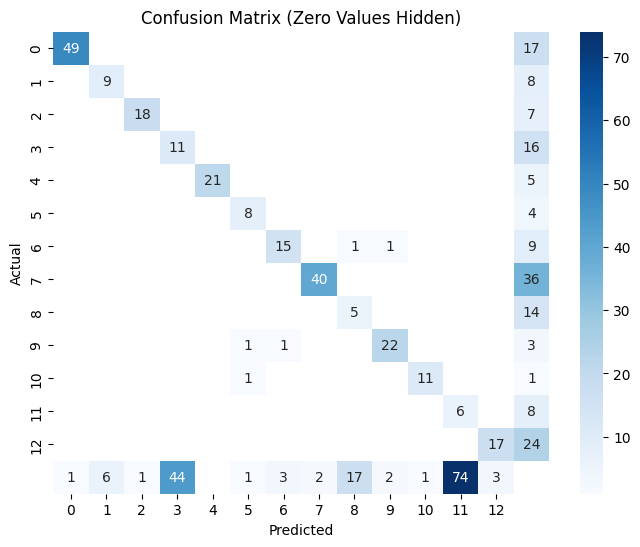

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Create a mask to hide zero values
mask = cm == 0

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=test_results.names,
            yticklabels=test_results.names, mask=mask, linewidths=0, linecolor='gray')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Zero Values Hidden)")
plt.show()


In [15]:
import numpy as np
import pandas as pd

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Compute per-class accuracy
class_accuracy = np.diag(cm) / cm.sum(axis=1)  # True Positives / Total Samples in Class

# Store results in a dictionary
accuracy_results = {
    test_results.names[i]: f"{class_accuracy[i] * 100:.2f}" if not np.isnan(class_accuracy[i]) else "0.00"
    for i in range(len(test_results.names))
}

# Convert to DataFrame for better readability
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Class", "Accuracy (%)"])

# Calculate average accuracy
avg_accuracy = accuracy_df["Accuracy (%)"].astype(float).mean()

# Display accuracy table
print(accuracy_df)
print(f"\n\033[1mAverage Accuracy: {avg_accuracy:.2f}%\033[0m")


               Class Accuracy (%)
0           Aircraft        74.24
1         Camouflage        52.94
2              Drone        72.00
3               Fire        40.74
4            Grenade        80.77
5           Hand-Gun        66.67
6              Knife        57.69
7   Military-Vehicle        52.63
8            Missile        26.32
9             Pistol        81.48
10             Rifle        84.62
11             Smoke        42.86
12           Soldier        41.46

Average Accuracy: 59.57%
